In [1]:
import pandas as pd
import json

In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.min_rows', 40)

In [3]:
RESULT_NAME = 'l3_NOmultiprocess_surplus_total'
RESULT_NAME

'l3_NOmultiprocess_surplus_total'

In [4]:
RESULT_PATH = f'../logs/{RESULT_NAME}.txt'
RESULT_PATH

'../logs/l3_NOmultiprocess_surplus_total.txt'

In [5]:
LEVEL_TO_BETA = {2: 78, 3: 196, 5: 120}
LEVEL_TO_BETA

{2: 78, 3: 196, 5: 120}

In [6]:
LEVEL_TO_MAX_M = {2: 1024, 3: 1280, 5: 1792}
LEVEL_TO_MAX_M

{2: 1024, 3: 1280, 5: 1792}

In [7]:
results = []
with open(RESULT_PATH, 'r') as file:
    for line in file.readlines():
        try:
            results.append(json.loads(line))
        except json.JSONDecodeError:
                pass
    
results = [result | {'attack_no': i} for i, result in enumerate(results)]
results

[{'attack_no': 0,
  'entry_results': [{'faulted_coeffs': 256,
    'total_equations': 256,
    'filtered_equations': 256,
    'duration': 0.31086111068725586,
    'failure': False,
    'equations_used': 256.0},
   {'faulted_coeffs': 256,
    'total_equations': 256,
    'filtered_equations': 256,
    'duration': 0.2844409942626953,
    'failure': False,
    'equations_used': 256.0},
   {'faulted_coeffs': 256,
    'total_equations': 256,
    'filtered_equations': 256,
    'duration': 0.3310890197753906,
    'failure': False,
    'equations_used': 256.0},
   {'faulted_coeffs': 256,
    'total_equations': 256,
    'filtered_equations': 256,
    'duration': 0.3108401298522949,
    'failure': False,
    'equations_used': 256.0},
   {'faulted_coeffs': 256,
    'total_equations': 256,
    'filtered_equations': 256,
    'duration': 0.30079102516174316,
    'failure': False,
    'equations_used': 256.0}],
  'm': 0,
  'num_signatures': 1,
  'nist_param_level': 3,
  'threshold': 196,
  'notion_of_s

In [8]:
meta = [key for key in results[0].keys() if key != 'entry_results']
meta

['attack_no',
 'm',
 'num_signatures',
 'nist_param_level',
 'threshold',
 'notion_of_success',
 'timeout_limit']

In [9]:
df = pd.json_normalize(data=results, record_path='entry_results', meta=meta)
nist_security_level = df['nist_param_level'].max()
df = df.assign(false_positive_rate=lambda x: (x.filtered_equations - x.faulted_coeffs) / x.filtered_equations)
df['surplus'] = df['notion_of_success'] - 256
df['percent'] = df['m'] / LEVEL_TO_MAX_M[nist_security_level]
df = df.sort_values('attack_no')
df

,faulted_coeffs,total_equations,filtered_equations,duration,failure,equations_used,failure_reason,attack_no,m,num_signatures,nist_param_level,threshold,notion_of_success,timeout_limit,false_positive_rate,surplus,percent
0,256,256,256,0.310861,False,256.0,NaN,0,0,1,3,196,256,300,0.000000,0,0.0
1,256,256,256,0.284441,False,256.0,NaN,0,0,1,3,196,256,300,0.000000,0,0.0
2,256,256,256,0.331089,False,256.0,NaN,0,0,1,3,196,256,300,0.000000,0,0.0
3,256,256,256,0.310840,False,256.0,NaN,0,0,1,3,196,256,300,0.000000,0,0.0
4,256,256,256,0.300791,False,256.0,NaN,0,0,1,3,196,256,300,0.000000,0,0.0
5,256,256,256,0.311412,False,256.0,NaN,1,0,1,3,196,256,300,0.000000,0,0.0
6,256,256,256,0.302784,False,256.0,NaN,1,0,1,3,196,256,300,0.000000,0,0.0
7,256,256,256,0.295113,False,256.0,NaN,1,0,1,3,196,256,300,0.000000,0,0.0
8,256,256,256,0.346805,False,256.0,NaN,1,0,1,3,196,256,300,0.000000,0,0.0
9,256,256,256,0.317755,False,256.0,NaN,1,0,1,3,196,256,300,0.000000,0,0.0


In [10]:
meta_surplus = [key for key in meta if key != 'notion_of_success' ] + ['surplus']
meta_surplus

['attack_no',
 'm',
 'num_signatures',
 'nist_param_level',
 'threshold',
 'timeout_limit',
 'surplus']

In [11]:
df_by_attack = df.groupby(meta_surplus).agg({'duration': 'mean', 'failure': 'any', 'false_positive_rate': 'mean', 'percent': 'max'}).reset_index().set_index(['attack_no']).sort_index()
df_by_attack

,m,num_signatures,nist_param_level,threshold,timeout_limit,surplus,duration,failure,false_positive_rate,percent
attack_no,,,,,,,,,,
0,0,1,3,196,300,0,0.307604,False,0.000000,0.000000
1,0,1,3,196,300,0,0.314774,False,0.000000,0.000000
2,1,2,3,196,300,0,0.420347,False,0.000000,0.000781
3,1,2,3,196,300,0,0.400991,False,0.000000,0.000781
4,2,2,3,196,300,0,0.384333,False,0.000000,0.001563
5,2,2,3,196,300,0,0.354848,False,0.000000,0.001563
6,3,2,3,196,300,0,0.357414,False,0.000000,0.002344
7,3,2,3,196,300,0,0.348053,False,0.000000,0.002344
8,4,2,3,196,300,0,0.347499,False,0.000000,0.003125


In [12]:
df_num_failures = df_by_attack.groupby(['m', 'surplus']).aggregate({'failure': 'sum', 'nist_param_level': 'max', 'percent': 'max'})
df_num_failures['good_success_rate'] = df_num_failures['failure'].apply(lambda x: x < 2)
df_num_failures = df_num_failures.sort_index()
df_num_failures

,,failure,nist_param_level,percent,good_success_rate
m,surplus,,,,
0,0,0,3,0.000000,True
1,0,0,3,0.000781,True
2,0,0,3,0.001563,True
3,0,0,3,0.002344,True
4,0,0,3,0.003125,True
5,0,0,3,0.003906,True
6,0,0,3,0.004687,True
7,0,0,3,0.005469,True
8,0,0,3,0.006250,True


In [13]:
df_m_max_surplus = df_num_failures[df_num_failures['good_success_rate']].reset_index()[['m', 'percent', 'surplus', 'nist_param_level']]
df_m_max_surplus

,m,percent,surplus,nist_param_level
0,0,0.000000,0,3
1,1,0.000781,0,3
2,2,0.001563,0,3
3,3,0.002344,0,3
4,4,0.003125,0,3
5,5,0.003906,0,3
6,6,0.004687,0,3
7,7,0.005469,0,3
8,8,0.006250,0,3
9,9,0.007031,0,3


In [14]:
largest_m_zero_surplus = df_m_max_surplus[df_m_max_surplus['surplus'] == 0]['m'].max()
largest_m_zero_surplus

1274

In [15]:
#df_m_nonzero_surplus = df_m_max_surplus[df_m_max_surplus['m'] > largest_m_zero_surplus]
df_m_nonzero_surplus = df_m_max_surplus.copy()
df_m_nonzero_surplus.to_json(f'l{nist_security_level}_dilithium_surplus_total.json')
df_m_nonzero_surplus

,m,percent,surplus,nist_param_level
0,0,0.000000,0,3
1,1,0.000781,0,3
2,2,0.001563,0,3
3,3,0.002344,0,3
4,4,0.003125,0,3
5,5,0.003906,0,3
6,6,0.004687,0,3
7,7,0.005469,0,3
8,8,0.006250,0,3
9,9,0.007031,0,3


<AxesSubplot:xlabel='iterations after fault occurs (%)', ylabel='minium surplus of equations needed (p)'>

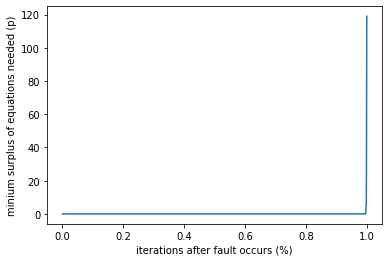

In [16]:
plot = df_m_nonzero_surplus.set_index('percent')['surplus'].plot(legend=False)
plot.set_xlabel('iterations after fault occurs (%)')
plot.set_ylabel('minium surplus of equations needed (p)')
fig = plot.get_figure()
fig.savefig(f'l{nist_security_level}_dilithium_surplus_total.pdf', format="pdf", bbox_inches='tight')
plot

In [17]:
df_by_attack_good_sr = df_by_attack.merge(df_m_nonzero_surplus, on=['m', 'surplus'])
df_by_attack_good_sr

,m,num_signatures,nist_param_level_x,threshold,timeout_limit,surplus,duration,failure,false_positive_rate,percent_x,percent_y,nist_param_level_y
0,0,1,3,196,300,0,0.307604,False,0.000000,0.000000,0.000000,3
1,0,1,3,196,300,0,0.314774,False,0.000000,0.000000,0.000000,3
2,1,2,3,196,300,0,0.420347,False,0.000000,0.000781,0.000781,3
3,1,2,3,196,300,0,0.400991,False,0.000000,0.000781,0.000781,3
4,2,2,3,196,300,0,0.384333,False,0.000000,0.001563,0.001563,3
5,2,2,3,196,300,0,0.354848,False,0.000000,0.001563,0.001563,3
6,3,2,3,196,300,0,0.357414,False,0.000000,0.002344,0.002344,3
7,3,2,3,196,300,0,0.348053,False,0.000000,0.002344,0.002344,3
8,4,2,3,196,300,0,0.347499,False,0.000000,0.003125,0.003125,3
9,4,2,3,196,300,0,0.362748,False,0.000000,0.003125,0.003125,3


In [18]:
df_by_attack_good_sr_successful = df_by_attack_good_sr[df_by_attack_good_sr['failure'] == False]
df_by_attack_good_sr_successful

,m,num_signatures,nist_param_level_x,threshold,timeout_limit,surplus,duration,failure,false_positive_rate,percent_x,percent_y,nist_param_level_y
0,0,1,3,196,300,0,0.307604,False,0.000000,0.000000,0.000000,3
1,0,1,3,196,300,0,0.314774,False,0.000000,0.000000,0.000000,3
2,1,2,3,196,300,0,0.420347,False,0.000000,0.000781,0.000781,3
3,1,2,3,196,300,0,0.400991,False,0.000000,0.000781,0.000781,3
4,2,2,3,196,300,0,0.384333,False,0.000000,0.001563,0.001563,3
5,2,2,3,196,300,0,0.354848,False,0.000000,0.001563,0.001563,3
6,3,2,3,196,300,0,0.357414,False,0.000000,0.002344,0.002344,3
7,3,2,3,196,300,0,0.348053,False,0.000000,0.002344,0.002344,3
8,4,2,3,196,300,0,0.347499,False,0.000000,0.003125,0.003125,3
9,4,2,3,196,300,0,0.362748,False,0.000000,0.003125,0.003125,3


In [19]:
df_by_attack_good_sr_successful_mean = df_by_attack_good_sr_successful.groupby('m').mean()
df_by_attack_good_sr_successful_mean.to_json(f'l{nist_security_level}_dilithium_surplus_sigcount_total.json')
df_by_attack_good_sr_successful_mean

,num_signatures,nist_param_level_x,threshold,timeout_limit,surplus,duration,failure,false_positive_rate,percent_x,percent_y,nist_param_level_y
m,,,,,,,,,,,
0,1.0,3.0,196.0,300.0,0.0,0.311189,0.0,0.000000,0.000000,0.000000,3.0
1,2.0,3.0,196.0,300.0,0.0,0.410669,0.0,0.000000,0.000781,0.000781,3.0
2,2.0,3.0,196.0,300.0,0.0,0.369591,0.0,0.000000,0.001563,0.001563,3.0
3,2.0,3.0,196.0,300.0,0.0,0.352734,0.0,0.000000,0.002344,0.002344,3.0
4,2.0,3.0,196.0,300.0,0.0,0.355124,0.0,0.000000,0.003125,0.003125,3.0
5,2.0,3.0,196.0,300.0,0.0,0.372469,0.0,0.000000,0.003906,0.003906,3.0
6,2.0,3.0,196.0,300.0,0.0,0.407432,0.0,0.000000,0.004687,0.004687,3.0
7,2.0,3.0,196.0,300.0,0.0,0.391517,0.0,0.000000,0.005469,0.005469,3.0
8,2.0,3.0,196.0,300.0,0.0,0.402997,0.0,0.000000,0.006250,0.006250,3.0


<AxesSubplot:xlabel='iterations after fault occurs (%)', ylabel='average signature count'>

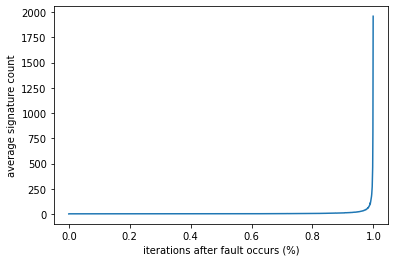

In [20]:
ax = df_by_attack_good_sr_successful_mean.reset_index().set_index('percent_x')['num_signatures'].plot(legend=False)
ax.set_xlabel('iterations after fault occurs (%)')
ax.set_ylabel('average signature count')
fig = ax.get_figure()
fig.savefig(f'l{nist_security_level}_dilithium_surplus_sigcount_total.pdf', format="pdf", bbox_inches='tight')
ax

Text(0, 0.5, 'avg. false-positive rate')

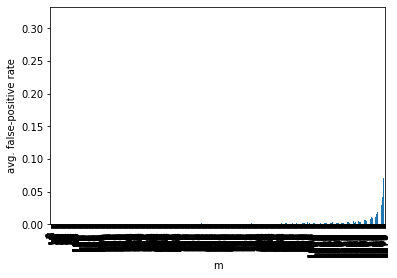

In [21]:
df_by_attack_good_sr_successful_mean['false_positive_rate'].plot(kind='bar', legend=False).set_ylabel("avg. false-positive rate")

Text(0, 0.5, 'avg. duration')

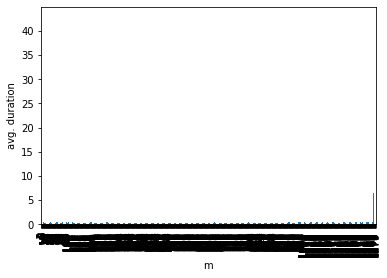

In [22]:
df_by_attack_good_sr_successful_mean['duration'].plot(kind='bar', legend=False).set_ylabel("avg. duration")